In [1]:
import numpy as np
import os

In [50]:
PATH = '..\\dataset'
LABELS_END = 'labels.npy'
FEATURES_END = '.npy'

In [53]:
def get_species_folders() -> list:
    return [folder for folder in os.listdir(PATH) if os.path.isdir(os.path.join(PATH, folder))]


def collect_species(species) -> np.ndarray:
    arr = np.zeros((0, 549))
    for file in os.listdir(os.path.join(PATH, species)):
        if file.endswith(LABELS_END):
            file_path = os.path.join(PATH, species, file)
            labels = np.load(file_path)
        if not file.endswith(LABELS_END) and file.endswith(FEATURES_END):
            file_path = os.path.join(PATH, species, file)
            samples = np.load(file_path)
            samples = np.append(samples, labels[:,0].reshape(-1, 1), axis=1)
            arr = np.append(arr,samples, axis=0)
    return arr


def collect_all_species() -> dict:
    all_species = {species: collect_species(species) for species in get_species_folders()}
    return all_species

In [54]:
all_species = collect_all_species()

In [55]:
all_species

{'comcuc': array([[1.66782930e-01, 7.94402882e-02, 4.90957062e+02, ...,
         3.17551899e+00, 1.37173927e+00, 0.00000000e+00],
        [2.41420195e-01, 2.66298577e-02, 4.67413574e+02, ...,
         1.92174816e+00, 2.07217550e+00, 0.00000000e+00],
        [2.64508933e-01, 2.35501658e-02, 5.11845062e+02, ...,
         1.74019897e+00, 1.97764945e+00, 0.00000000e+00],
        ...,
        [4.65959832e-02, 2.11018492e-02, 5.30830811e+02, ...,
         2.89781690e+00, 1.13324404e+00, 1.00000000e+00],
        [9.57031250e-02, 2.74258368e-02, 4.75840723e+03, ...,
         1.43826663e+00, 1.51661360e+00, 0.00000000e+00],
        [6.59877211e-02, 3.64289321e-02, 9.97737579e+01, ...,
         2.41034365e+00, 1.23088503e+00, 0.00000000e+00]]),
 'cowpig1': array([[1.11746654e-01, 4.26452570e-02, 1.02604507e+02, ...,
         1.79751599e+00, 1.92932880e+00, 0.00000000e+00],
        [8.12639520e-02, 2.82990858e-02, 1.10250000e+04, ...,
         2.15445113e+00, 1.29964221e+00, 0.00000000e+00],
    

In [74]:
# last column is the label
print(all_species['comcuc'][:, -1])
# all columns except the last one are the features
print(all_species['cowpig1'][:, :-1])
print(all_species['eucdov'].shape)

[0. 0. 0. ... 1. 0. 0.]
[[1.11746654e-01 4.26452570e-02 1.02604507e+02 ... 6.62549496e+00
  1.79751599e+00 1.92932880e+00]
 [8.12639520e-02 2.82990858e-02 1.10250000e+04 ... 2.90908480e+00
  2.15445113e+00 1.29964221e+00]
 [8.09849352e-02 3.19984481e-02 8.53287988e+03 ... 3.83109021e+00
  1.75042462e+00 1.17069829e+00]
 ...
 [4.99441959e-02 8.24402180e-03 1.30472214e+02 ... 3.31218982e+00
  1.79222655e+00 8.64830732e-01]
 [4.79910709e-02 7.49982148e-03 1.42557266e+02 ... 2.72130871e+00
  2.08534360e+00 9.12369668e-01]
 [3.51562500e-02 6.96427654e-03 1.16084343e+02 ... 2.40624785e+00
  2.10456371e+00 1.01296377e+00]]
(20000, 549)


In [87]:
correlation_matrices = {species: np.corrcoef(all_species[species].T) for species in all_species.keys()}

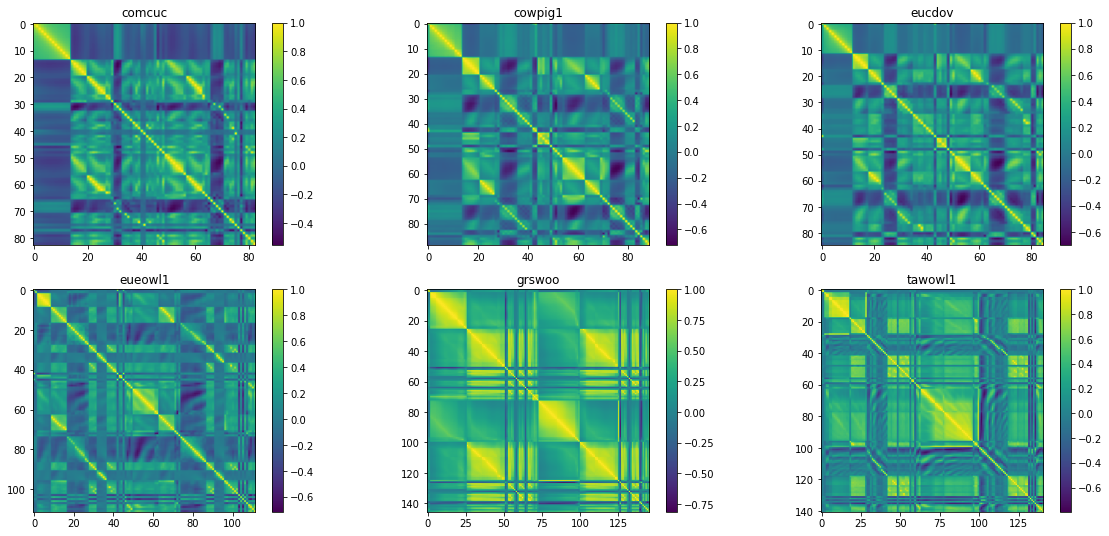

In [103]:
import matplotlib.pyplot as plt
# plot in grid
plt.figure(figsize=(20, 9))
for i, species in enumerate(correlation_matrices.keys()):
    plt.subplot(2, 3, i+1)
    plt.imshow(correlation_matrices[species])
    plt.title(species)
    plt.colorbar()
# save plot
plt.savefig('..\\plots\\correlation_matrices.jpg')
plt.show()

In [129]:
# get feature names
with open(os.path.join(PATH, 'feature_names.txt'), 'r') as f:
    feature_names = f.read().splitlines()
print(feature_names)

['zcr_mean', 'zcr_std', 'yin_0', 'yin_1', 'yin_2', 'yin_3', 'yin_4', 'yin_5', 'yin_6', 'yin_7', 'yin_8', 'yin_9', 'yin_10', 'yin_11', 'yin_12', 'yin_13', 'raw_melspect_mean_0', 'raw_melspect_mean_1', 'raw_melspect_mean_2', 'raw_melspect_mean_3', 'raw_melspect_mean_4', 'raw_melspect_mean_5', 'raw_melspect_mean_6', 'raw_melspect_mean_7', 'raw_melspect_mean_8', 'raw_melspect_mean_9', 'raw_melspect_mean_10', 'raw_melspect_mean_11', 'raw_melspect_mean_12', 'raw_melspect_mean_13', 'raw_melspect_mean_14', 'raw_melspect_mean_15', 'raw_melspect_mean_16', 'raw_melspect_mean_17', 'raw_melspect_mean_18', 'raw_melspect_mean_19', 'raw_melspect_mean_20', 'raw_melspect_mean_21', 'raw_melspect_mean_22', 'raw_melspect_mean_23', 'raw_melspect_mean_24', 'raw_melspect_mean_25', 'raw_melspect_mean_26', 'raw_melspect_mean_27', 'raw_melspect_mean_28', 'raw_melspect_mean_29', 'raw_melspect_mean_30', 'raw_melspect_mean_31', 'raw_melspect_mean_32', 'raw_melspect_mean_33', 'raw_melspect_mean_34', 'raw_melspect_me

In [130]:
correlation_with_label = {species: np.abs(correlation_matrices[species][-1, :-1]) for species in correlation_matrices.keys()}
sorted_correlation_with_label = {species: np.argsort(correlation_with_label[species]) for species in correlation_with_label.keys()}
sorted_correlation_with_label = {species: [feature_names[i] for i in sorted_correlation_with_label[species]] for species in sorted_correlation_with_label.keys()}
top_10 = {species: sorted_correlation_with_label[species][-10:] for species in sorted_correlation_with_label.keys()}
bottom_10 = {species: sorted_correlation_with_label[species][:10] for species in sorted_correlation_with_label.keys()}

In [141]:
# plot top feature for each species
for species in top_10.keys():
    plt.figure(figsize=(20, 9))
    plt.barh(range(10), correlation_with_label[species][sorted_correlation_with_label[species][-10:]])
    plt.yticks(range(10), top_10[species])
    plt.title(species)
    plt.savefig(f'..\\plots\\{species}_top_10.jpg')
    plt.show()

C:\Users\emind\AppData\Local\Temp/ipykernel_7764/4101755292.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.barh(range(10), correlation_with_label[species][sorted_correlation_with_label[species][-10:]])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1440x648 with 0 Axes>